In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import cv2
import matplotlib.pyplot as plt

Charger le jeu de donnees  CIFAR -10

In [ ]:
# Charger le jeu de données CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Limiter la taille du jeu de données pour un entraînement rapide avec SVM
X_train, y_train = X_train[:5000], y_train[:5000]
X_test, y_test = X_test[:1000], y_test[:1000]


**Limiter la taille du jeu de donneés pour un entrainment rapid avec SVM**

In [ ]:
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]


**Normalisation des images pour que les valeurs de pixel soient entre 0 et 1**

In [ ]:
# Normalisation des images pour que les valeurs de pixels soient entre 0 et 1
X_train, X_test = X_train / 255.0, X_test / 255.0


**Afficher quelques images pour verifier**

<ipython-input-30-72340ce65f1c>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


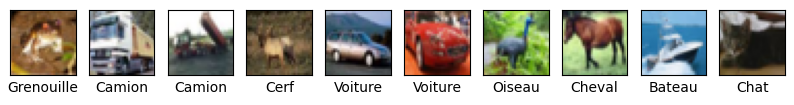

In [ ]:
# Afficher quelques images pour vérifier
class_names = ['Avion', 'Voiture', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()


In [ ]:
# Fonction pour transformer les images en vecteurs de caractéristiques
def extract_features(images):
    features = []
    for img in images:
        # Convertir en niveaux de gris pour simplifier
        gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

        # Redimensionner l'image en 16x16 pour réduire la dimension
        resized = cv2.resize(gray, (16, 16), interpolation=cv2.INTER_LINEAR)

        # Aplatir l'image en un vecteur 1D et normaliser
        features.append(resized.flatten() / 255.0)

    return np.array(features)


In [ ]:
# Extraire les caractéristiques des ensembles d'entraînement et de test
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)


Précision du modèle SVM : 28.00%


<ipython-input-34-7e299109cb68>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_test[i])]


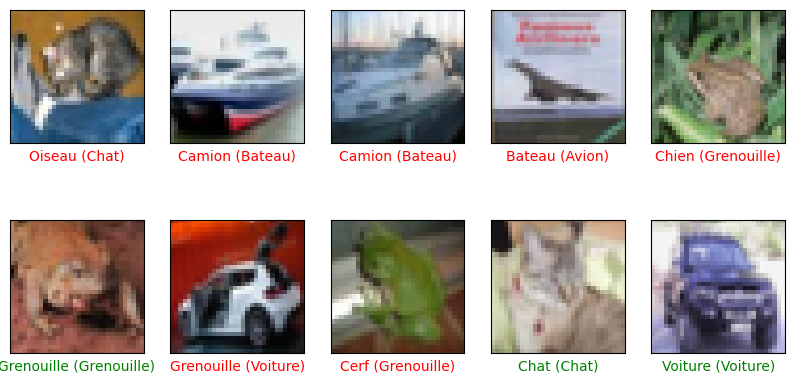

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Initialiser le SVM avec un noyau linéaire
model_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')

# Entraîner le modèle SVM
model_svm.fit(X_train_features, y_train.ravel())

# Prédire les classes sur l'ensemble de test
y_pred = model_svm.predict(X_test_features)

# Calculer et afficher la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM : {:.2f}%".format(accuracy * 100))

# Afficher quelques exemples de prédictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])

    # Prédiction et étiquette réelle
    predicted_label = class_names[int(y_pred[i])]
    true_label = class_names[int(y_test[i])]

    # Afficher l'étiquette prédite et l'étiquette réelle
    color = "green" if predicted_label == true_label else "red"
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()
